<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/03_Numerical_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Numerical Data Visualization</h1>

## Overview
<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight:bold">
    <p>Data visualization helps in anlysing the features of the data and helps in feature selction. In this section we will </p>
    <ol>
        <li>Import Cleaned Data.</li>
        <li>Split in Categorical and Numerical Features.</li>
        <li>Visualize Numerical Data.</li>
    </ol>
</div>

### Standard Imports.

In [ ]:
#Run this cell working in colab.
!pip install klib
!pip install matplotlib=3.51

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import klib as kl
import matplotlib.pyplot as plt

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Disable pretty
%pprint
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set() 

Pretty printing has been turned OFF


In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Import Cleaned Data

In [4]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv')
data = kl.data_cleaning(data)

Long column names detected (>25 characters). Consider renaming the following columns ['parent_school_satisfaction'].
Shape of cleaned data: (478, 17)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-83.33%)



In [ ]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_cleaned.csv'
data = pd.read_csv(url)
data = kl.data_cleaning(data)

In [5]:
# Cheack the data is properly loaded
data.head()

,gender,nationality,place_of_birth,stage_id,grade_id,section_id,topic,semester,relation,raised_hands,visited_resources,announcements_view,discussion,parent_answering_survey,parent_school_satisfaction,student_absence_days,class
0,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
# Data Characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   gender                      478 non-null    category
 1   nationality                 478 non-null    category
 2   place_of_birth              478 non-null    category
 3   stage_id                    478 non-null    category
 4   grade_id                    478 non-null    category
 5   section_id                  478 non-null    category
 6   topic                       478 non-null    category
 7   semester                    478 non-null    category
 8   relation                    478 non-null    category
 9   raised_hands                478 non-null    int8    
 10  visited_resources           478 non-null    int8    
 11  announcements_view          478 non-null    int8    
 12  discussion                  478 non-null    int8    
 13  parent_answering_sur

### 2. Split in Categorical and Numerical Features

In [7]:
CATEGORICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] == 'category'])[:-1]
CATEGORICAL_FEATURES

['gender', 'nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']

In [8]:
NUMERICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] != 'category'])
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

### 3. Visualize Numerical Data.

Numerial data can have following issues when considered for training ML models:

**Non Uniform Distribution:** Variables with non uniform distributions tends to bias regression models.

**Low Frequency:** Low frequncy values may be present in trianig set, but not in test set, causing over-fitting to the train set.

**Low Frequency:** Low frequncy values may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it for scoring.

**Out Liers:** The prence out ouliers in some cases represent the error in the recorded values.

In [9]:
# NUMERICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] != 'category'])
if 'class' not in NUMERICAL_FEATURES:
    NUMERICAL_FEATURES.append('class')
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion', 'class']

In [10]:
numerical_df = data[NUMERICAL_FEATURES]
numerical_df.head()

,raised_hands,visited_resources,announcements_view,discussion,class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [11]:
stats = numerical_df.describe()
stats.transpose()

,count,mean,std,min,25%,50%,75%,max
raised_hands,478.0,46.887029,30.787903,0.0,16.00,50.0,75.0,100.0
visited_resources,478.0,54.974895,33.035071,0.0,20.00,65.0,84.0,99.0
announcements_view,478.0,38.014644,26.623507,0.0,14.25,33.0,58.0,98.0
discussion,478.0,43.410042,27.620961,1.0,20.00,39.5,70.0,99.0


<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> The statistics of the Numerical Features provide valueable infomation about the data.</p>
<ol>
    <li>The Numerical Fearure are Integral Values.</li>
    <li>All the Fearture lie in the range of 0 to 100.</li>
    <li>Standard Deviation of around 30 means the data is fairly spread.</li>
</ol>
</div>


#### 3.1 Visulalization of Individual Numerical Features

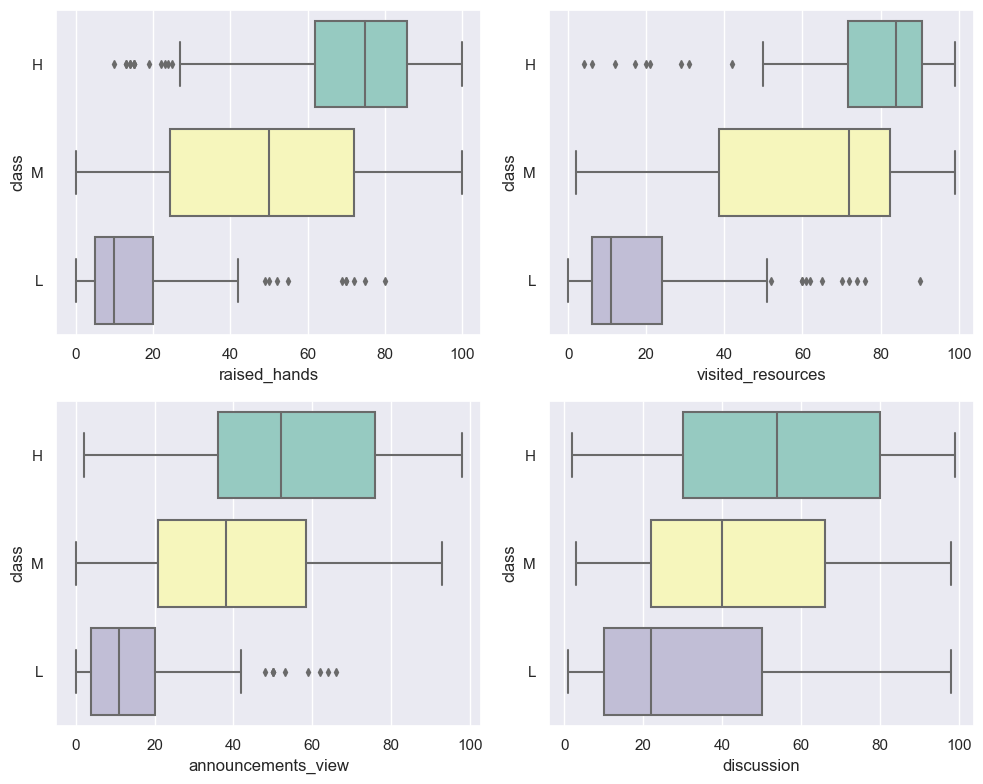

In [12]:
fig, axs = plt.subplots(2,2)

for i,feature in enumerate(NUMERICAL_FEATURES[:-1]):
    x = 0 if i < 2 else 1
    y = i if i < 2 else i-2
    sns.boxplot(x=feature, y="class", data = numerical_df, ax=axs[x,y],  palette="Set3", order=["H","M","L"], fliersize=4);
    # sns.swarmplot(x=feature, y="class", data=numerical_df, ax=axs[x,y], color='black')
    #sns.boxplot(x=feature, data = numerical_df, ax=axs[x,y]);

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> The box plot shows the presence of few outliers in some of the feature.</p>
</div>


In [13]:
NUMERICAL_FEATURES[:-1]

['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

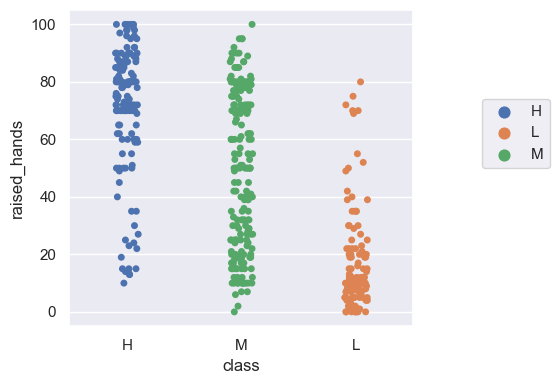

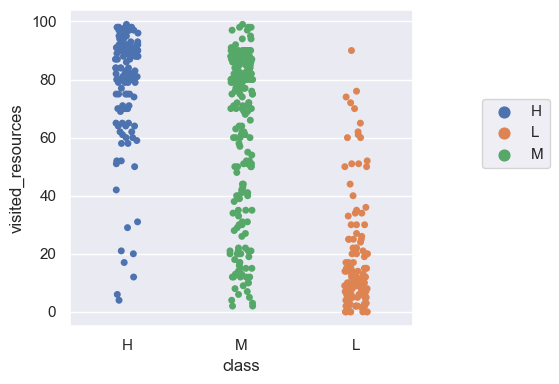

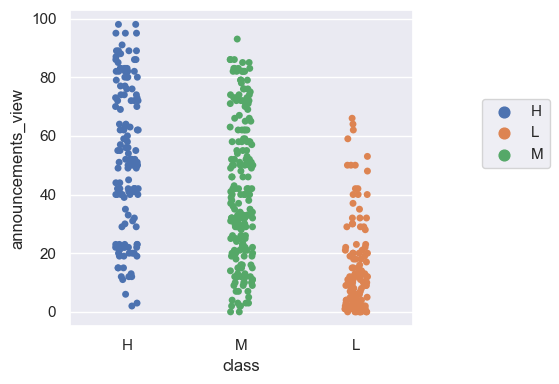

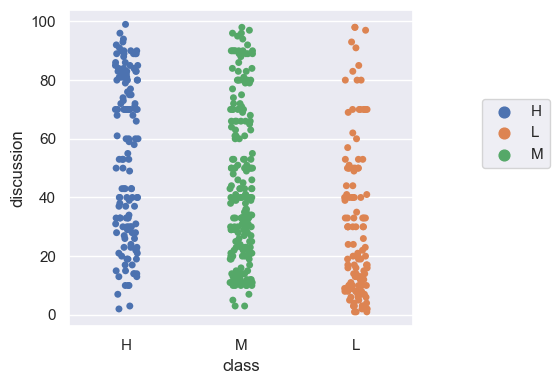

In [14]:
for i,feature in enumerate(NUMERICAL_FEATURES[:-1]):   
    plt.figure(figsize=(6,4))
    sns.stripplot(x='class',y=NUMERICAL_FEATURES[i], data=numerical_df, jitter=True, hue='class', order=["H","M","L"], dodge = False)
    plt.legend(loc=(1.2,0.5));

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> The stipplot plot shows density of data with respect to output class.</p>
</div>

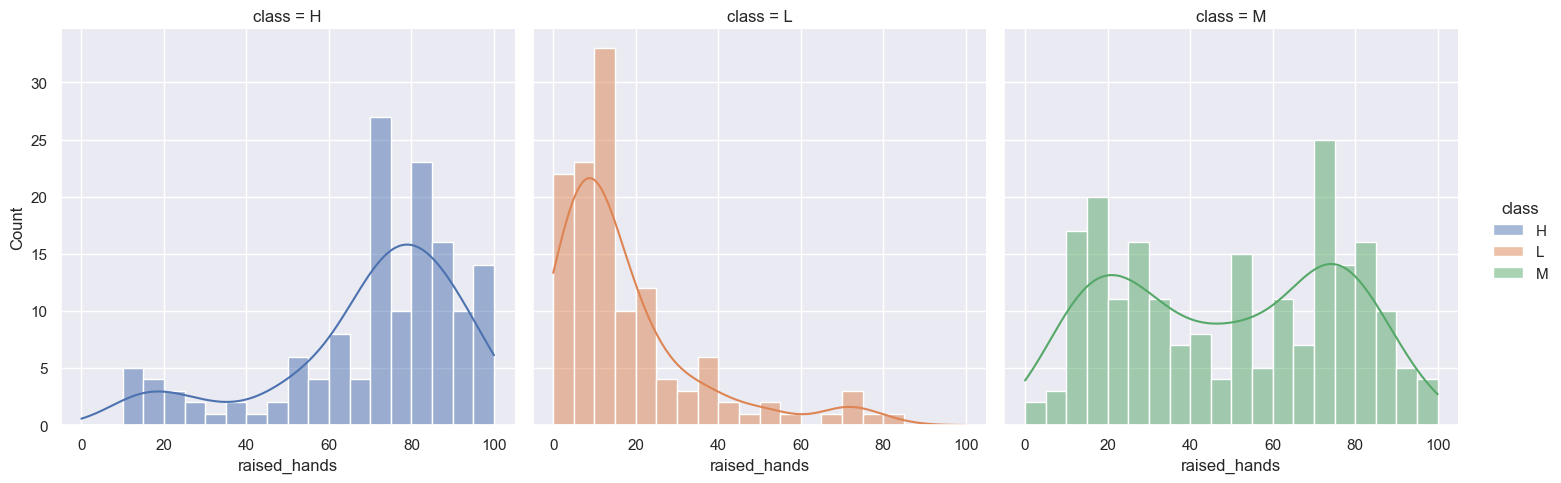

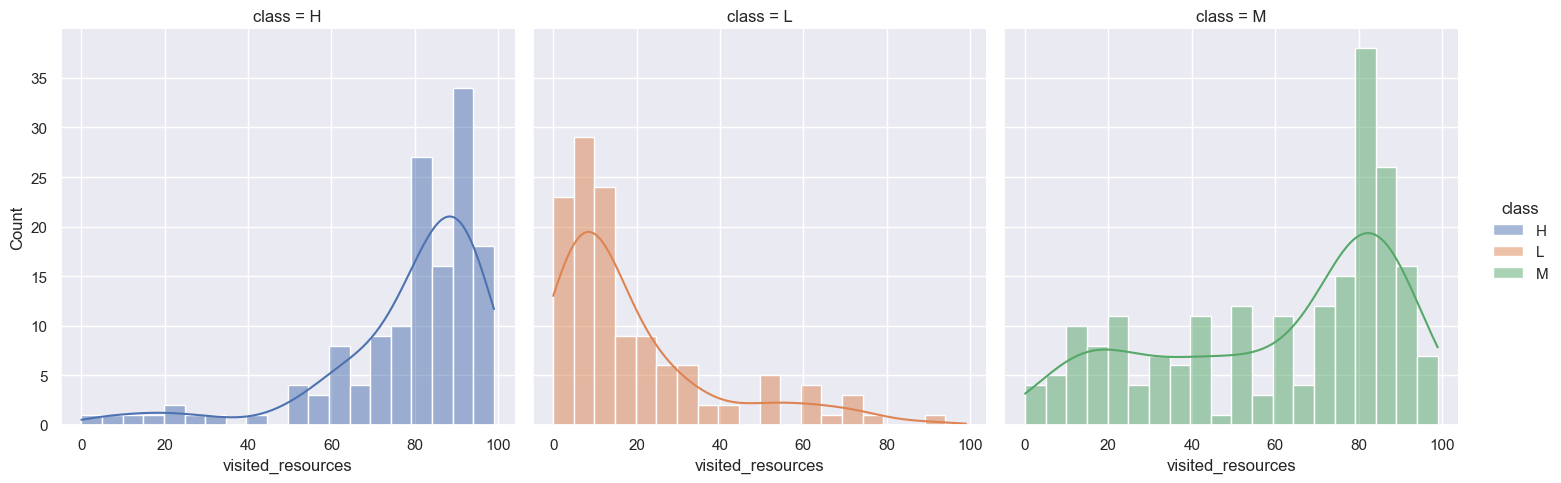

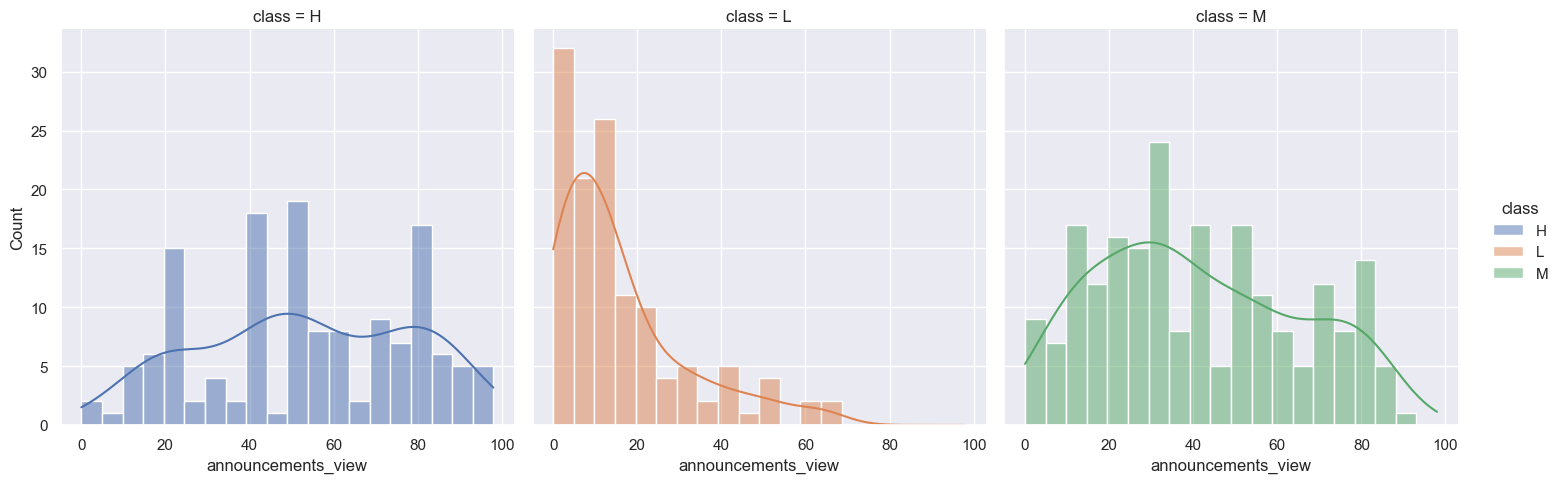

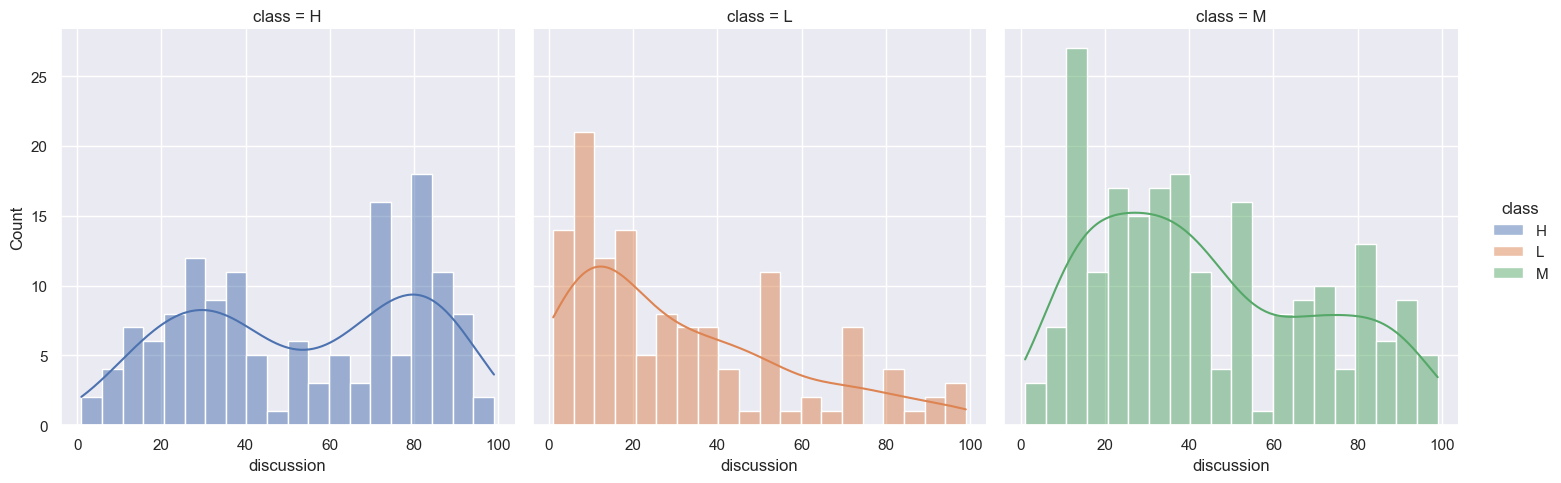

In [15]:
for feature in NUMERICAL_FEATURES[:-1]:
    sns.displot(numerical_df, x=feature, col="class", hue='class', bins = 20, kde=True);

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> The histograms of Numerical Features with respect of individaul output class is again another form of representing the data densities.</p>
</div>

#### 3.2 Visulalization of Paired Numerical Features.

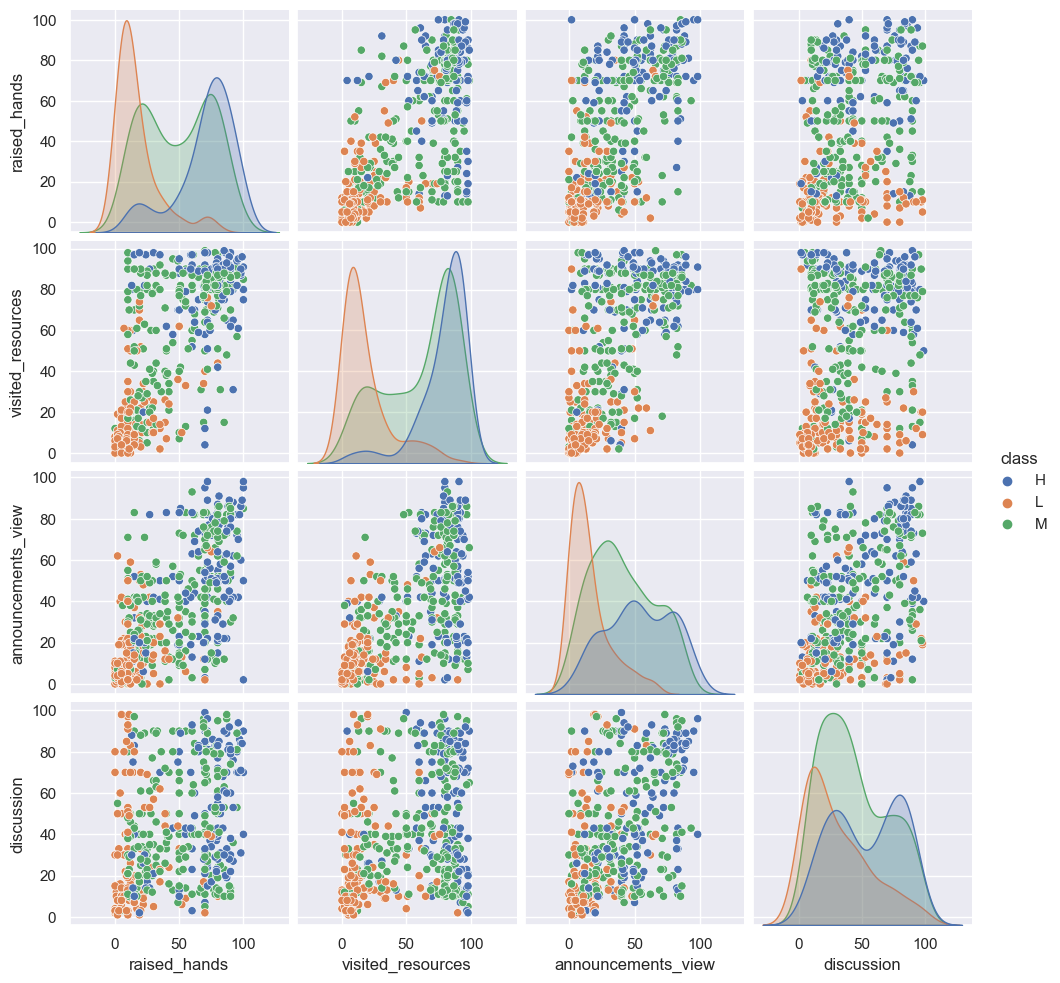

In [16]:
plt.rcParams["figure.figsize"] = [8.00, 6.00]
sns.pairplot(numerical_df, hue='class');

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<ol> 
    <li>The scatter plots of the paired input feature show clustering in High Level and Low Level achiever class.</li>
    <li>The data in Meduium Level achivers class is quite spread.
</ol>
</div>

## Observations
Graphically visualizing the categorical feature we observe:    

1. The Data numerically represent the behaviour patterns.
1. The numerical data is of descrete nature.
2. The data values are in the range of 0-100.
3. Presence of some outliers in the data.
4. Slight biasness in data towards Low and High Level achivers.

## Conclusion
Based on the obervations:

1. The outliers will be kept in the features as they are expected. 
2. The biasness towards High and Low Level achievers is also expected. High achievers are more active then Low achievers.
3. The Middle Level achievers were expected to be in the middle of the two but as the distribution is bimodal, that is some behave more like the High achievers and some more like Low achivers. This represent non uniform class boundries.
4. For further processing the Numerical data will be kept as it is except for normalization of the values.  